# Customer Churn Analysis - Predicting Why Customers Leave

**Objective**
Analyze telecom customer data to identify key factors of churn and build a predictor model to flag customers at risk for leaving.

**Tools Used**
- Python
- Pandas
- Matplotlib
- Seaborn
- Scikit-learn

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

In [7]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Cleaning and Preparation

- Removed Duplicated rows
- Converted 'TotalCharges' from string to numeric
- Dropped missing rows
- Replaced "No internet service" with "No" in several columns
- Standardized categorical values and removed label 'customerID'

In [11]:
df.drop('customerID', axis=1, inplace=True)

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [20]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.

In [24]:
cols_to_clean =['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_to_clean:
    df[col]=df[col].replace({'No internet service': 'No'})

In [26]:
df['SeniorCitizen']= df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

In [29]:
df.duplicated().sum()

22

In [31]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,No,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,Yes,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [33]:
df.drop_duplicates(inplace=True)

In [35]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

In this section, we will explore the patterns in churn across customer characteristics like contract type and monthly charges.

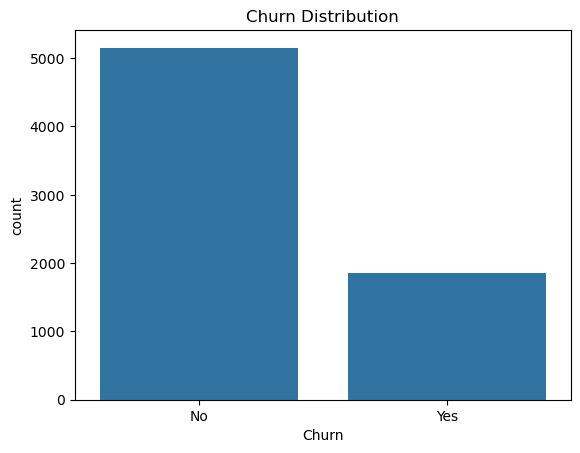

In [39]:
import seaborn  as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

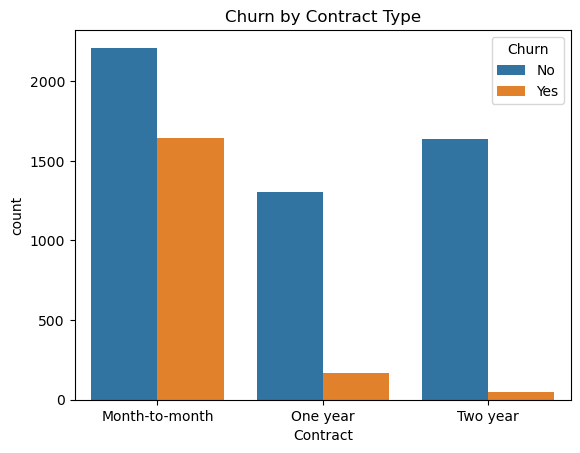

In [43]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()

In this graph, we can see that month-to-month contracts have a higher churn rate than customers who have one year or two year contracts.

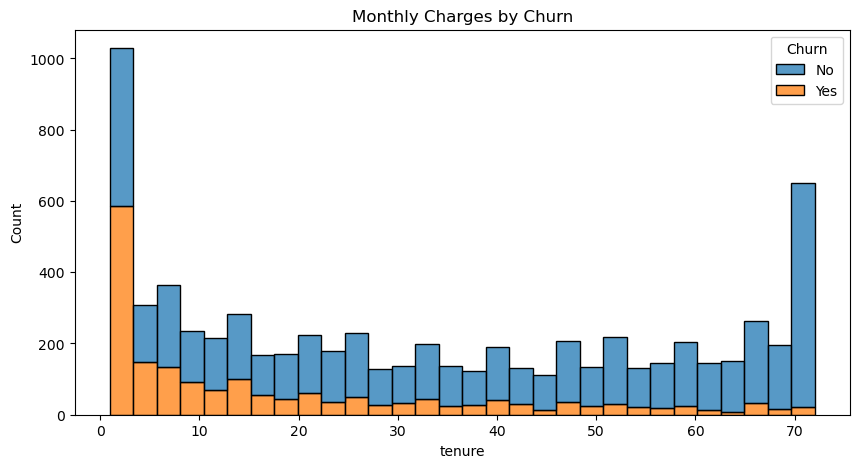

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Monthly Charges by Churn')
plt.show()

In this graph, we can see that higher monthly charges are associated with a higher churn rate.

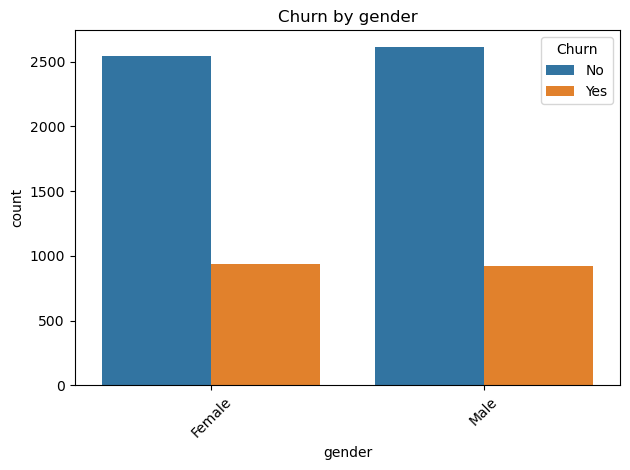

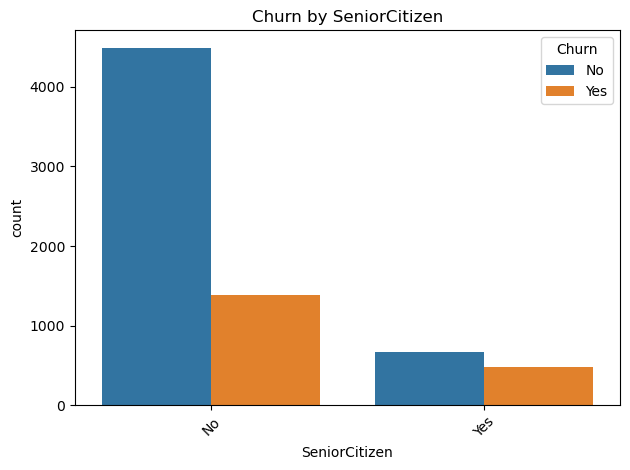

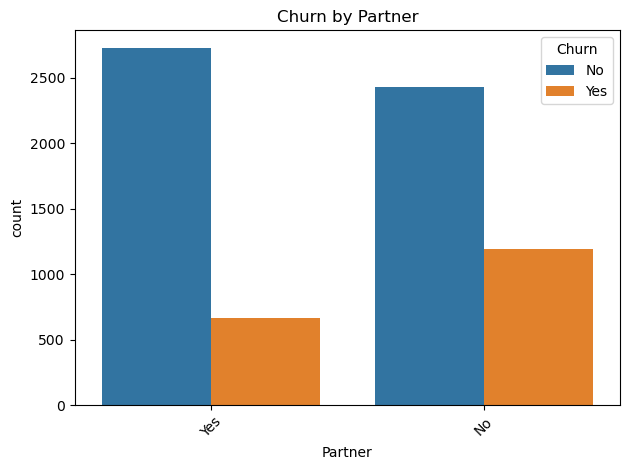

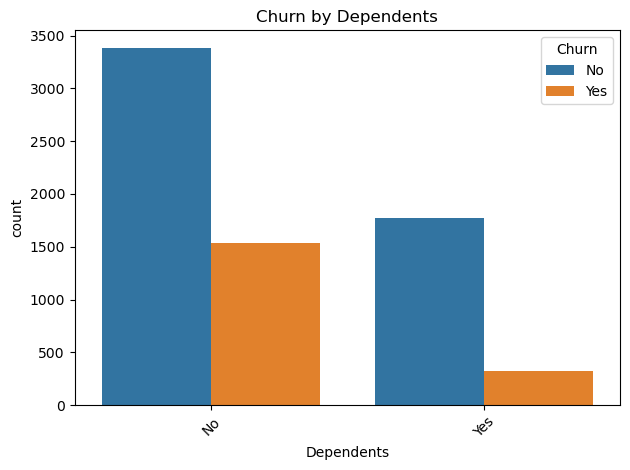

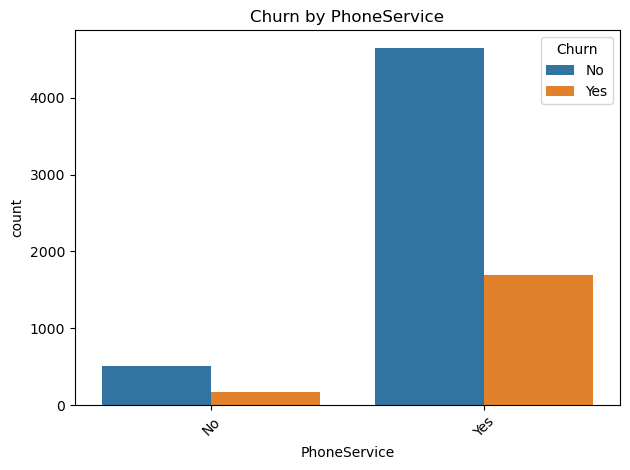

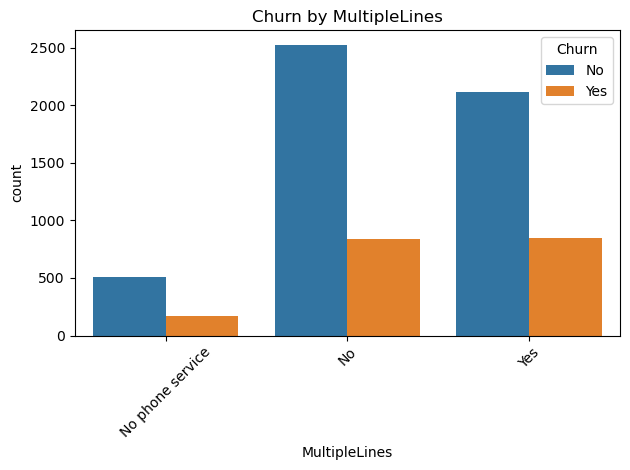

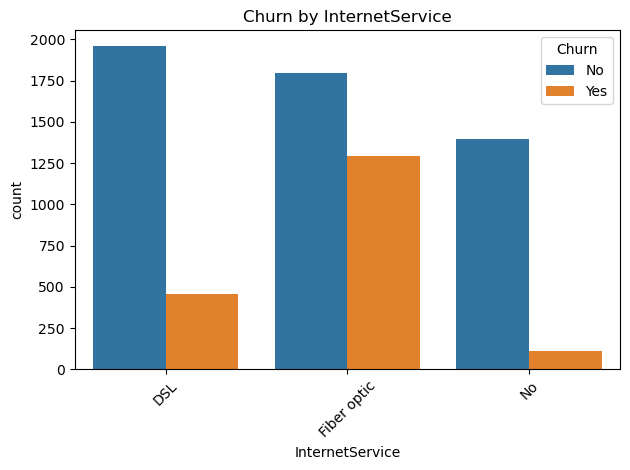

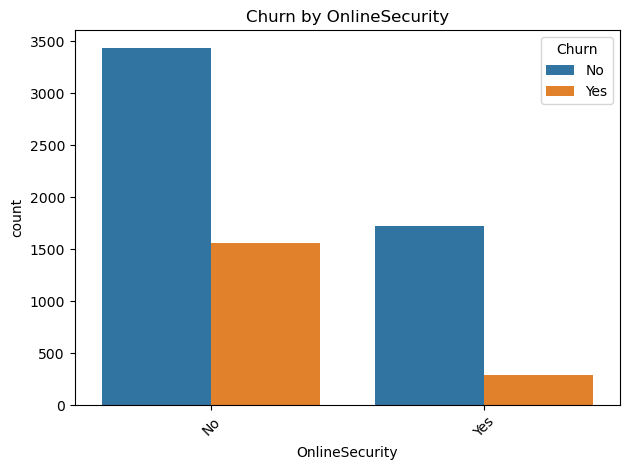

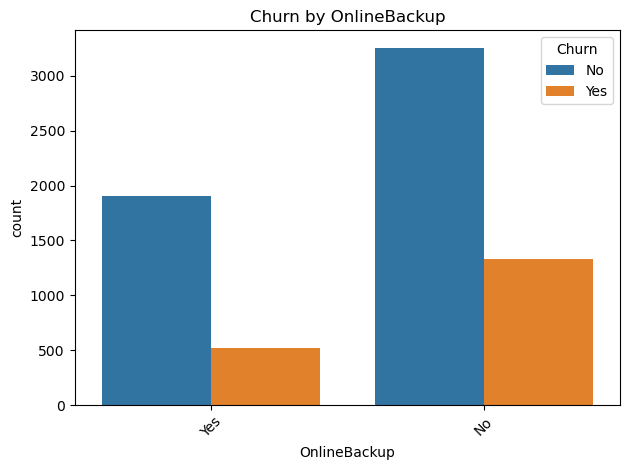

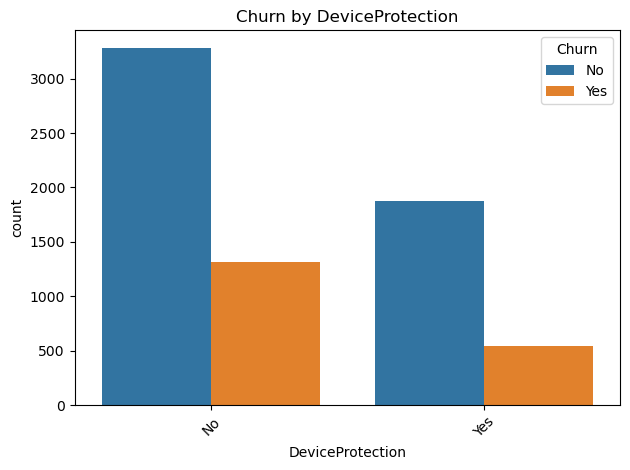

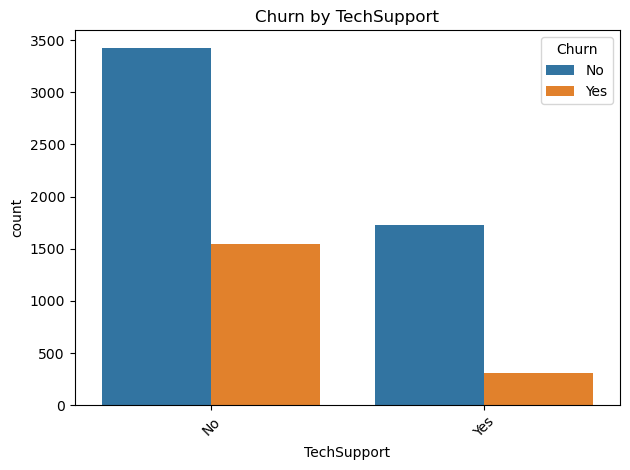

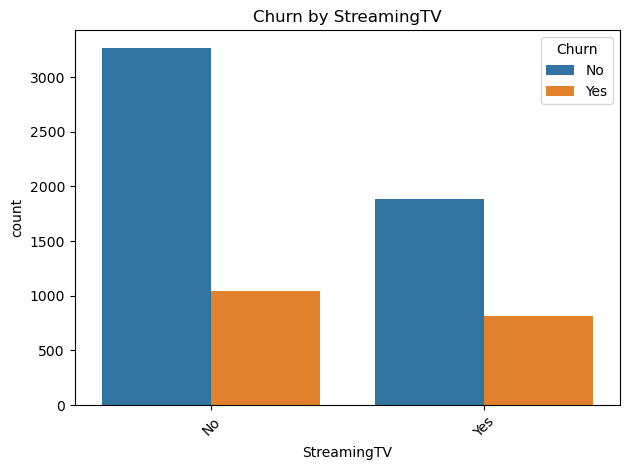

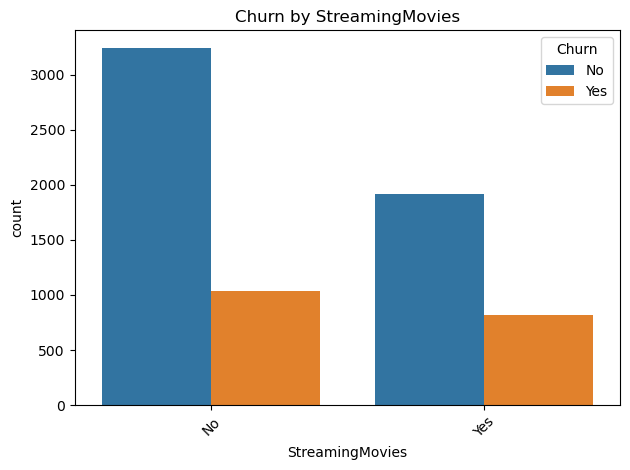

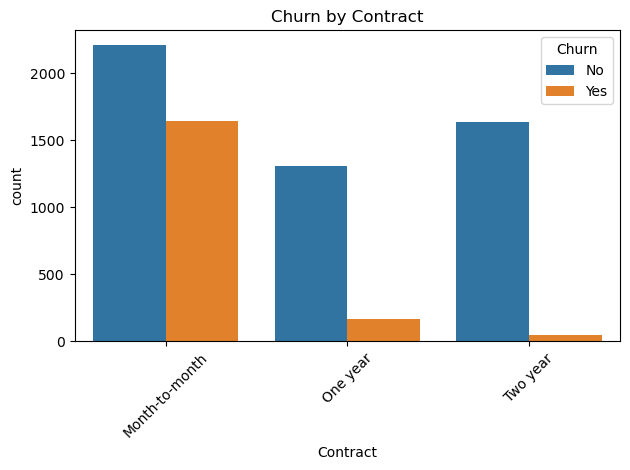

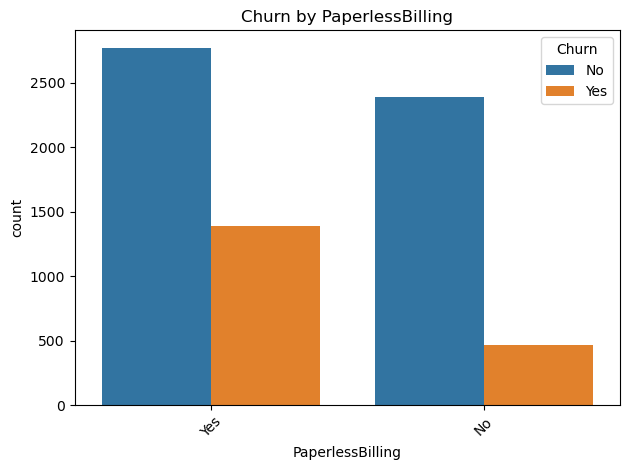

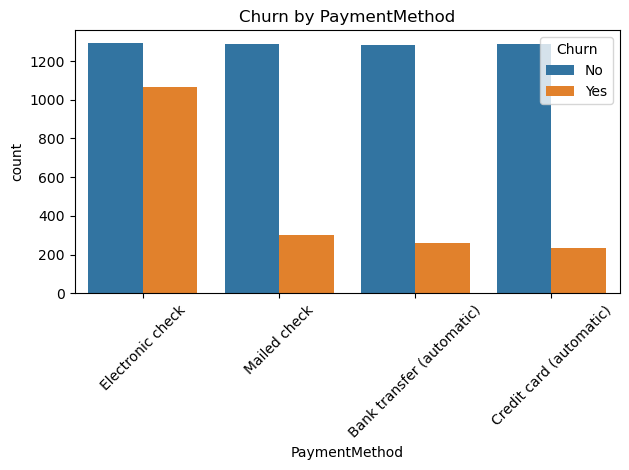

In [47]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    if col !='Churn':
        sns.countplot(data=df, x=col, hue='Churn')
        plt.title(f'Churn by {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In these graphs, we can see that customers who do not get, **tech support**, **online security**, or **device protection** are more likely to leave. Conversely, customers who did recieve these services were more likely  to stay.

In [49]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

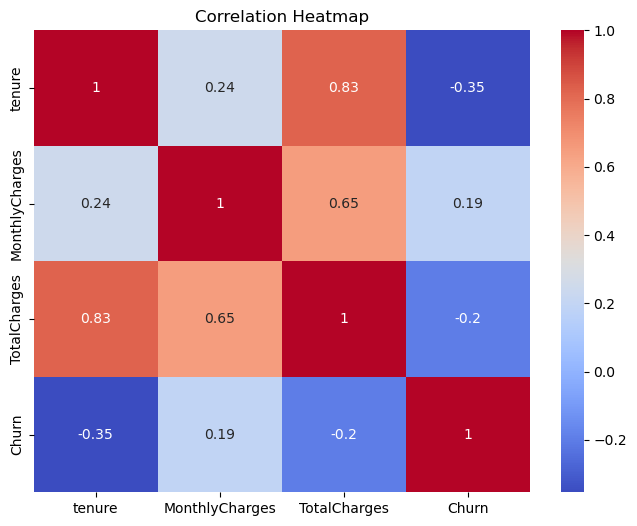

In [51]:
import seaborn as sns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [55]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [59]:
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (5608, 24)
Test shape: (1402, 24)


## Predictive Modeling: Random Forest

In this section, a random forest classifier was trained to predict customer churn using the encoded dataset. The model used was selected because of its ability to handle numerical and categorical data and provide feauture important scores.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1031
           1       0.63      0.46      0.53       371

    accuracy                           0.79      1402
   macro avg       0.73      0.68      0.70      1402
weighted avg       0.77      0.79      0.77      1402



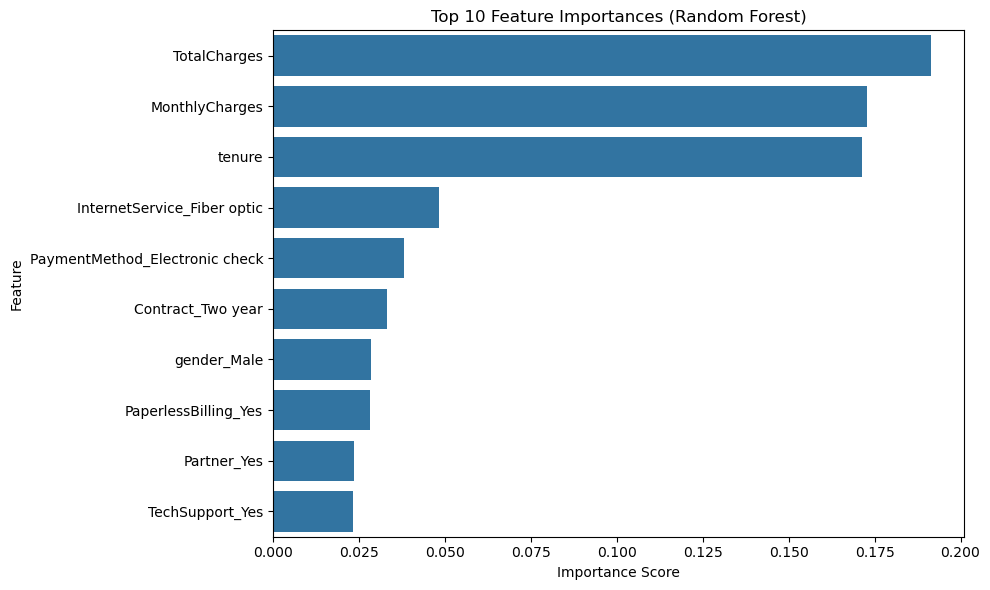

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices[:10]], y=X.columns[indices[:10]])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

plt.show()

## Top Factors in Churn (Feature Importance)

Based on the Random Forest model, the most influental features contributing to churn are:

- **TotalCharges**: Indicates overall customer value. Higher charges are linked to greater churn risks.
- **Contract Type**: Month-to-month contracts are strongly associated with higher churn.
- **TechSupport_Yes**: Having tech support reduced churn. A lack of it was a churn risk.
- **PaperlessBilling** and **PaymentMethod**: show predictive influence with customers who choose paper less billing often churning more. Conversely, with payment method, customers who usee electronic checks churn more while customers who use Auto-pay stay longer.

## Business Recommendations

Based on the analysis and model insights, I would recommend the following actions:

- **Incentivize customers to commit to longer-term contracts** (can offer discounts for annual plans to incentivize customers to sign on for longer periods of time).
- **Introduce retention campaigns targeting high-churn risk segments**, especially those with month-to-month plans or no value-added services.
- **Bundle high-charge services** like streaming, tech support, and security to increase perceived value.
- **Offer onboarding support and security trials** to customers who decline these services initially.

These steps could directly address the pain points driving churn and improve overall customer retention.